# 機械学習 第1回　レポート課題



## はじめに

本レポートでは, 以下のデータセットと手法を用いて機械学習を行う.

- データセット
    - scikit-learnのデータセットの中にあるボストンの住宅価格のデータセットを利用.
    - data: 506個, 属性13種類. MEDVが教師データ.
- 特徴
    - CRIM     per capita crime rate by town
    - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
    - INDUS    proportion of non-retail business acres per town
    - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    - NOX      nitric oxides concentration (parts per 10 million)
    - RM       average number of rooms per dwelling
    - AGE      proportion of owner-occupied units built prior to 1940
    - DIS      weighted distances to five Boston employment centres
    - RAD      index of accessibility to radial highways
    - TAX      full-value property-tax rate per \$10,000
    - PTRATIO  pupil-teacher ratio by town
    - B        1000(Bk-0.63)^2 where Bk is the proportion of blacks by town
    - LSTAT    % lower status of the population
    - MEDV     Median value of owner-occupied homes in $1000's
    

In [99]:
from sklearn import datasets
boston = datasets.load_boston() # ボストンの住宅価格のデータセットを読み込み

In [100]:
from pandas import DataFrame #pandasモジュール
boston_df = DataFrame(boston.data) #型をDataFrame型に変換
boston_df.columns = boston.feature_names #列名の設定
boston_df["price"] = boston.target #住宅価格の追加

In [101]:
rooms_train = DataFrame(boston_df["RM"]) #部屋数のデータを抜き出す
Y_train = boston.target #テスト用の教師データ（住宅価格）
from sklearn import linear_model #線形回帰モジュールのインポート
model = linear_model.LinearRegression() #回帰モデル
model.fit(rooms_train, Y_train) #データを入れて訓練

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [102]:
#テストデータの作成
rooms_test=DataFrame(np.arange(float(rooms_train.min()), float(rooms_train.max()), 0.1))
prices_test=model.predict(rooms_test)

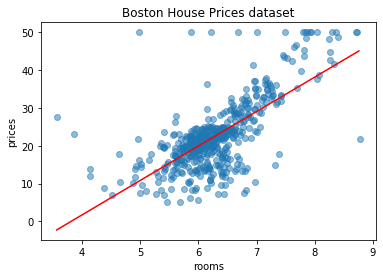

In [103]:
import matplotlib.pyplot as plt
import numpy as np
plt.scatter(np.array(rooms_train), Y_train, alpha=0.5) #訓練データの散布図
plt.plot(rooms_test, prices_test, c="r") #回帰直線
plt.title("Boston House Prices dataset")
plt.xlabel("rooms")
plt.ylabel("prices")
plt.show()